[View in Colaboratory](https://colab.research.google.com/github/sungreong/TIL/blob/master/Tensorflow_basic_and_tf_layers_estimator_api.ipynb)

In [0]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
learning_rate = 0.001
num_steps = 1000
batch_size = 128
display_step= 10 

num_input = 784
num_classes = 10 
dropout = 0.75

X = tf.placeholder( tf.float32 , [ None , num_input ])
Y = tf.placeholder( tf.float32 , [ None , num_classes ])

keep_prob = tf.placeholder( tf.float32 )

In [0]:
def conv2d( x , W , b ,strides = 1 ) : 
    x = tf.nn.conv2d( x , W , strides = [ 1, strides , strides , 1], padding ="SAME")
    x = tf.nn.bias_add(x, b )
    return tf.nn.relu(x)

def maxpool2d( x , k = 2 ) :
    return tf.nn.max_pool( x, ksize  = [ 1, k , k , 1] , strides = [1, k , k , 1 ] ,
                         padding ="SAME")

def conv_net(x, weights, biases, dropout):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [0]:
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}


logits = conv_net( X , weights , biases , keep_prob )
prediction = tf.nn.softmax(logits)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)


# 평가 모델 
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables 
init = tf.global_variables_initializer()

In [0]:

with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", batch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("최적화 완료")

    # Calculate accuracy for 256 MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images[:256],
                                      Y: mnist.test.labels[:256],
                                      keep_prob: 1.0}))

Step 1, batch Loss= 92664.6719, Training Accuracy= 0.070
Step 10, batch Loss= 27938.1289, Training Accuracy= 0.234
Step 20, batch Loss= 13057.3467, Training Accuracy= 0.438
Step 30, batch Loss= 4391.1191, Training Accuracy= 0.648
Step 40, batch Loss= 5976.3457, Training Accuracy= 0.719
Step 50, batch Loss= 2334.0117, Training Accuracy= 0.836
Step 60, batch Loss= 3988.5864, Training Accuracy= 0.805
Step 70, batch Loss= 4373.7988, Training Accuracy= 0.758
Step 80, batch Loss= 3984.5835, Training Accuracy= 0.812
Step 90, batch Loss= 1424.6488, Training Accuracy= 0.883
Step 100, batch Loss= 2473.2803, Training Accuracy= 0.844
Step 110, batch Loss= 2358.7480, Training Accuracy= 0.852
Step 120, batch Loss= 1220.6567, Training Accuracy= 0.883
Step 130, batch Loss= 1414.3293, Training Accuracy= 0.922
Step 140, batch Loss= 1143.6433, Training Accuracy= 0.898
Step 150, batch Loss= 2222.1631, Training Accuracy= 0.867
Step 160, batch Loss= 963.7920, Training Accuracy= 0.930
Step 170, batch Loss= 7

In [0]:
from __future__ import division, print_function, absolute_import

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
# Training Parameters
learning_rate = 0.001
num_steps = 3000
batch_size = 128

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.25 # Dropout, probability to drop a unit

In [0]:
def conv_net( x_dict , n_classes , dropout , reuse , is_training ) :
    
    with tf.variable_scope( "Convnet" , reuse = reuse ) :
        x = x_dict["images"]
        
        x= tf.reshape( x , shape = [-1 ,28 , 28 , 1 ])
        
        conv1 = tf.layers.conv2d( x, 32 , 5 ,activation= tf.nn.relu )
        conv1 = tf.layers.max_pooling2d( conv1 , 2, 2 )
        
        conv2 = tf.layers.conv2d( conv1 , 64 , 5, activation = tf.nn.relu)
        conv2 = tf.layers.max_pooling2d( conv2 , 2, 2 )
        
        fc1 = tf.contrib.layers.flatten( conv2 )
        fc1 = tf.layers.dense( fc1 , 1024 )
        fc1 = tf.layers.dropout( fc1 , rate= dropout , training = is_training ) 
        
        out = tf.layers.dense( fc1 , n_classes )
       
    return out
        

In [0]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    # Because Dropout have different behavior at training and prediction time, we
    # need to create 2 distinct computation graphs that still share the same weights.
    logits_train = conv_net(features, num_classes, dropout, reuse=False, is_training=True)
    logits_test = conv_net(features, num_classes, dropout, reuse=True, is_training=False)
    
    # Predictions
    pred_classes = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [0]:
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpnaxxuksc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa79b838b00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)
# Train the Model
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnaxxuksc/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2000 into /tmp/tmpnaxxuksc/model.ckpt.
INFO:tensorflow:loss = 0.01786662, step = 2000
INFO:tensorflow:global_step/sec: 95.1443
INFO:tensorflow:loss = 0.009625992, step = 2100 (1.056 sec)
INFO:tensorflow:global_step/sec: 114.111
INFO:tensorflow:loss = 0.0012876425, step = 2200 (0.878 sec)
INFO:tensorflow:global_step/sec: 124.04
INFO:tensorflow:loss = 0.0028572963, step = 2300 (0.804 sec)
INFO:tensorflow:global_step/sec: 119.343
INFO:tensorflow:loss = 0.00773081, step = 2400 (0.839 sec)
INFO:tensorflow:global_step/sec: 117.955
INFO:tensorflow:loss = 0.010796163, step = 2500 (0.844 sec)
INFO:tensorflow:global_step/sec: 118.249
INFO:tensorflow:l

In [0]:
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-16-11:40:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnaxxuksc/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-16-11:40:31
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9895, global_step = 5000, loss = 0.051539198
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmpnaxxuksc/model.ckpt-5000


{'accuracy': 0.9895, 'global_step': 5000, 'loss': 0.051539198}

In [0]:
# Predict single images
n_images = 4
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnaxxuksc/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[7, 2, 1, 0]

4


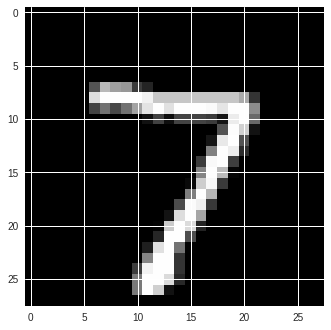

Model prediction: 7


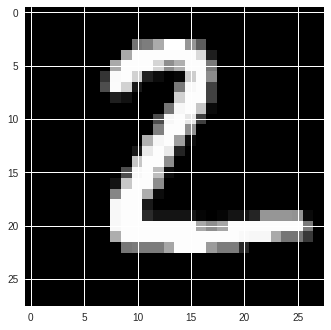

Model prediction: 2


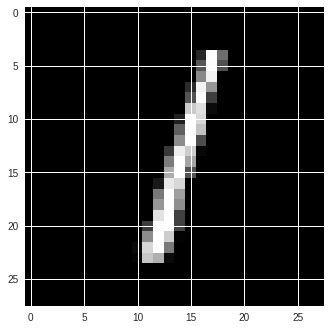

Model prediction: 1


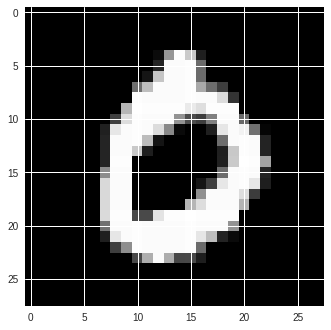

Model prediction: 0


In [0]:
# Display
print(n_images )
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])